In [2]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Search for best hyperparameters using GridSearchCV and RandomForestRegressor

In [3]:
cars = pd.read_csv("final_cars.csv")

In [4]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [5]:
X = pd.get_dummies(X)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#### Set aside some data for testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [13]:
model = RandomForestRegressor()
params_grid  = [{'n_estimators' : [100,200,300] , 'max_features': [2,4,6]}]

In [22]:
grid_search = GridSearchCV(model, params_grid, cv = 5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features=2,
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=No

In [23]:
## display scores 
results = grid_search.cv_results_
for score,param in zip(results['mean_test_score'], results['params']):
      print(score,param)

0.8156517361437814 {'max_features': 2, 'n_estimators': 100}
0.8131059759458928 {'max_features': 2, 'n_estimators': 200}
0.8150779294612104 {'max_features': 2, 'n_estimators': 300}
0.8227852937063442 {'max_features': 4, 'n_estimators': 100}
0.826414999468709 {'max_features': 4, 'n_estimators': 200}
0.8230521997540562 {'max_features': 4, 'n_estimators': 300}
0.8238236193293276 {'max_features': 6, 'n_estimators': 100}
0.8227276381111108 {'max_features': 6, 'n_estimators': 200}
0.8346551224025429 {'max_features': 6, 'n_estimators': 300}


In [24]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 300}

In [25]:
grid_search.best_score_

0.8346551224025429

In [26]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Build model with best estimator

In [27]:
model = grid_search.best_estimator_

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)

In [34]:
np.sqrt(mse)

2344.610571280324

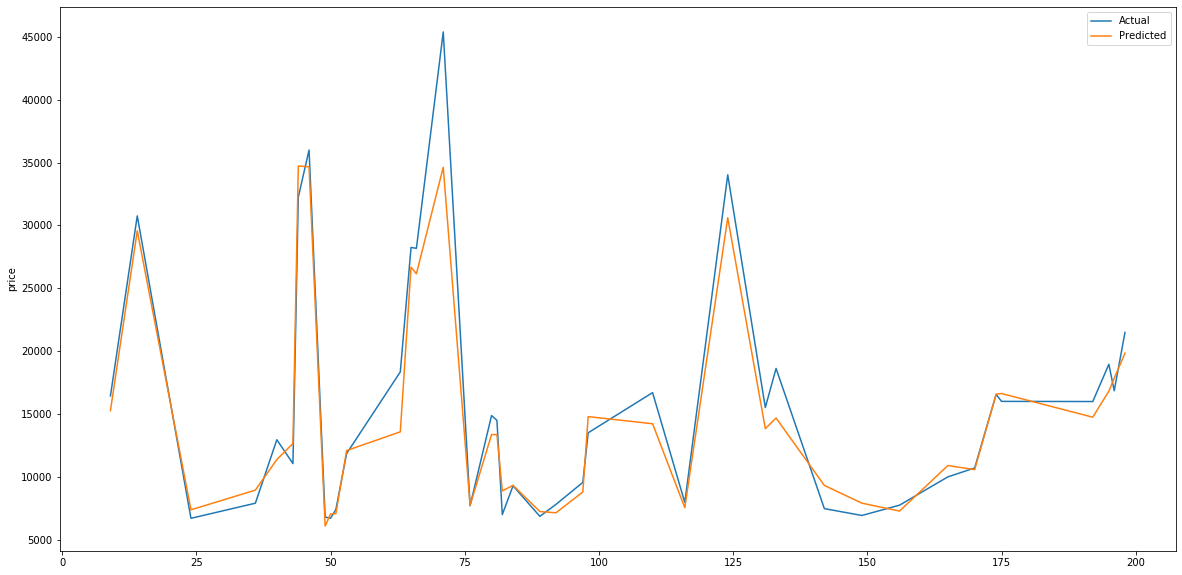

In [35]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")